In [3]:
from problem import mlp_problem
from environment import Environment
from problem import MLP_problem
import torch 
from stable_baselines3.common.env_checker import check_env
import stable_baselines3
from train_agent import test_agent

MLP_problem = mlp_problem()

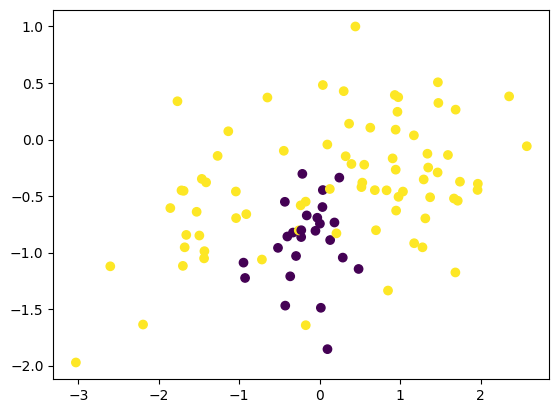

In [4]:
#plot the dataset
import matplotlib.pyplot as plt
x,y = MLP_problem["dataset"]
plt.scatter(x[:,0],x[:,1],c=y)

In [5]:
#show the model
MLP_problem["model0"]

Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): ReLU()
  (2): Linear(in_features=2, out_features=1, bias=True)
  (3): Sigmoid()
)

In [6]:
#show the objective function
MLP_problem["obj_function"](MLP_problem["model0"])

tensor(1.0011, grad_fn=<AddBackward0>)

In [18]:
# define the problem list
problem_list = [MLP_problem for _ in range(10)]
# number of steps in each episode
num_steps = 100
optimizer_class_list=[torch.optim.SGD, torch.optim.Adam]

def get_rewards(optimizer_class_list, do_train=False):
    # define the environment based on the problem list
    env = Environment(problem_list = problem_list,
                    model =  MLP_problem["model0"],
                    num_steps = num_steps, 
                    history_len = 10, 
                    objective_function = MLP_problem["obj_function"],
                    optimizer_class_list = optimizer_class_list
                    )
    policy = stable_baselines3.PPO('MlpPolicy', env, n_steps=2, verbose=0,
                                            tensorboard_log='tb_logs/norm')
    if do_train:
        # train the agent
        agent_training_timesteps = 10000
        policy.learn(total_timesteps=agent_training_timesteps)

    actions, rewards = test_agent(env, policy, num_episodes=1, num_steps=100000)
    return rewards

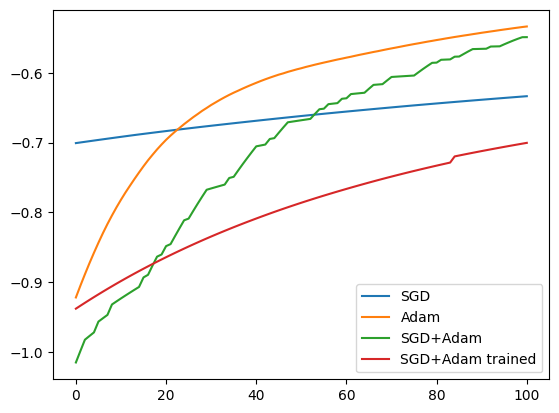

In [19]:
plt.plot(get_rewards([torch.optim.SGD]), label="SGD")
plt.plot(get_rewards([torch.optim.Adam]), label="Adam")
plt.plot(get_rewards([torch.optim.SGD, torch.optim.Adam]), label="SGD+Adam")
plt.plot(get_rewards([torch.optim.SGD, torch.optim.Adam], do_train=True), label="SGD+Adam trained")
plt.legend()



In [14]:
get_rewards([torch.optim.SGD])

[-0.8008502721786499,
 -0.800152063369751,
 -0.7994560599327087,
 -0.7987601161003113,
 -0.7980538010597229,
 -0.7973499298095703,
 -0.7966485023498535,
 -0.7959496974945068,
 -0.7952531576156616,
 -0.7945592403411865,
 -0.7938677668571472,
 -0.7931786775588989,
 -0.7924919724464417,
 -0.7918077707290649,
 -0.7911258935928345,
 -0.7904464602470398,
 -0.7897692322731018,
 -0.7890945672988892,
 -0.7884221076965332,
 -0.7877520322799683,
 -0.7870842814445496,
 -0.7864188551902771,
 -0.7857557535171509,
 -0.7850948572158813,
 -0.7844364047050476,
 -0.7837799787521362,
 -0.7831259369850159,
 -0.7824741005897522,
 -0.7818244695663452,
 -0.7811771035194397,
 -0.7805320024490356,
 -0.7798891067504883,
 -0.7792481780052185,
 -0.7786096930503845,
 -0.7779732346534729,
 -0.7773389220237732,
 -0.7767066955566406,
 -0.7760767936706543,
 -0.7754489183425903,
 -0.7748231887817383,
 -0.7741995453834534,
 -0.7735779881477356,
 -0.7729584574699402,
 -0.7723411917686462,
 -0.7717258334159851,
 -0.7711253